Problem 1.
===
We want to verify that the code for the basic binary classification on Kaggle.com dog_vs_cats dataset, as provided in the Jupyter Notebook 5.2-using- convnets-with-small-dateset.ipynb, works. We refer to the convnet with 4 convolutional layers, 4 max_pooling layers, 1 flatten layer and 2 dense layers. Modify your model by adding plain vanilla regularization, as we did in Problem 3 of Assignment 05. Keras has a specific syntax for adding regularization. Please examine: https://keras.io/regularizers/. Add an L2 regulizer on next to the last Dense layer. That is the one with (512,1) output tensor. As the regularization lambda, use the value of 0.0001. Run your model for 15 epochs and compare it with the original result on the model without regularization. Present the plots of training and validation accuracies and let us know whether regularization alleviate the overfitting and to what extent. Save your model as an H5 file.
(30%)

In [1]:
import os
# put the dataset directory where the jupyter notebook is run

# data under ./cats_and_dogs_small/ were generated from kaggle dataset using 
#  prep code in 5.2-using-convnets-with-small-datasets notebook which is not included in this solution
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [2]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Add regularizer
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

/Users/yuzhang/hw/tensor/cscie89/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# how does our data batches look like
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
# train for 15 epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 76s 763ms/step - loss: 0.7689 - acc: 0.5260 - val_loss: 0.7316 - val_acc: 0.6170
Epoch 2/15
100/100 [==============================] - 75s 748ms/step - loss: 0.7164 - acc: 0.6125 - val_loss: 0.6857 - val_acc: 0.6550
Epoch 3/15
100/100 [==============================] - 75s 749ms/step - loss: 0.6622 - acc: 0.6465 - val_loss: 0.6596 - val_acc: 0.6300
Epoch 4/15
100/100 [==============================] - 75s 747ms/step - loss: 0.6210 - acc: 0.6940 - val_loss: 0.6602 - val_acc: 0.6650
Epoch 5/15
100/100 [==============================] - 75s 747ms/step - loss: 0.5840 - acc: 0.7150 - val_loss: 0.6532 - val_acc: 0.6610
Epoch 6/15
100/100 [==============================] - 75s 746ms/step - loss: 0.5549 - acc: 0.7385 - val_loss: 0.6365 - val_acc: 0.6750
Epoch 7/15
100/100 [==============================] - 75s 749ms/step - loss: 0.5272 - acc: 0.7655 - val_loss: 0.6139 - val_acc: 0.6950
Epoch 8/15
100/100 [==============================] - 7

In [8]:
model.save('hw6_problem_1.h5')

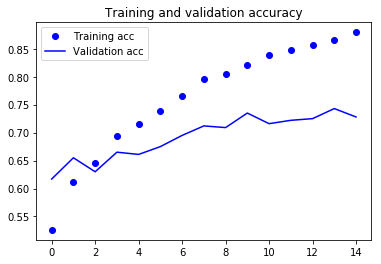

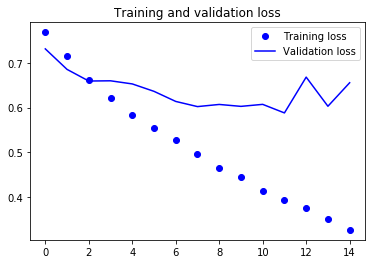

In [9]:
# Plots for P1
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In original training model without regularizer, training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss keeps decreasing linearly until it reaches nearly 0.

Problem 2.
===
Demonstrate image augmentation for dog breed of your choice. Produce one
modified image for every one of listed options: rotation_range, width_shift,
shear_range, zoom_range, and horizontal_flip.
(15%)

In [7]:
# New reshape image data generator with all listed options
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

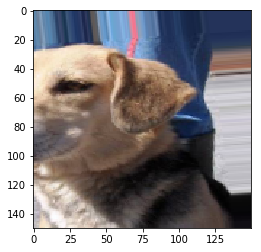

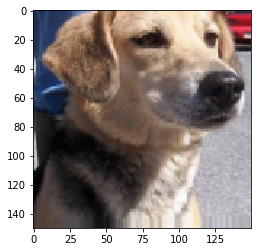

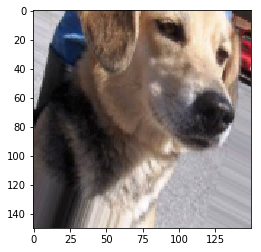

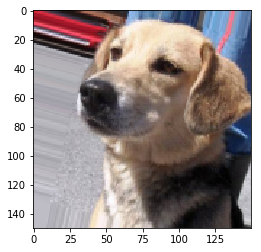

In [9]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
# get the dogs out!
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

# pick a dog that looks cute
img_path = fnames[30]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# flow() out 4 as required
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

# show me the dog!
plt.show()

Problem 3. 
===
Add image augmentation to the network in Problem 1 and report whether
training and validation accuracy with the combined regularization and augmentation
differ significantly from the original results obtained on the network with augmentation
only. Train your network on half the number of epochs as in the original notebook. Save
your model as an H5 file.
(30%)

In [10]:
# this time use image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# don't augment test data
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# model is from Problem 1 which had regularizer added
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 122s 1s/step - loss: 0.5579 - acc: 0.7312 - val_loss: 0.5320 - val_acc: 0.7494
Epoch 2/50
100/100 [==============================] - 121s 1s/step - loss: 0.5493 - acc: 0.7394 - val_loss: 0.5167 - val_acc: 0.7635
Epoch 3/50
100/100 [==============================] - 122s 1s/step - loss: 0.5486 - acc: 0.7406 - val_loss: 0.5291 - val_acc: 0.7354
Epoch 4/50
 98/100 [============================>.] - ETA: 2s - loss: 0.5478 - acc: 0.7363

KeyboardInterrupt: 

In [ ]:
model.save('hw6_problem_2.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Training and validation accuracy with model obtained with augmentation only both reached 84%

Problem 4.
===
In Jupyter notebook 5.3-using-a-pretrained-convnet.ipynb
we have training and validation accuracy for fine-tuned VGG16 network. We tuned the
last 3 conv layers including: block5_conv1, block5_conv2 and
block5_conv3. Examine whether fine-tuning layer block5_conv3 only and freezing
layers: block5_conv1,and block5_conv2 will result in significant decrease in
training accuracy. Report the number of trainable parameters when you are fine tuning
last 3 convolutional layers vs. when you are training only the very last layer
block5_conv3. Also, you do not have to rerun the example from the book. Run only the one
with a single trainable layer and compare.

In [13]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [14]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [18]:
conv_base.trainable = False

In [19]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30


KeyboardInterrupt: 

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    # only unfreeze layer block5_conv3
    if layer.name == 'block5_conv3':
        set_trainable = True
    
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after unfreezing only the block5_conv3 layer:', len(model.trainable_weights))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('hw6_p4.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In the original training process where the last 3 conv layers are opened for fine tuning, we were seeing a nice 1% absolute improvement after the fine tuning.

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)